In [30]:
df = pd.read_csv('est.csv')

In [31]:
print(df)

        Years  Month      Country  Temperature  Monthly_variation  Anomaly
0        1848      5  Afghanistan       19.573             -0.297    2.037
1        1848      6  Afghanistan       23.894             -0.796    2.136
2        1848      7  Afghanistan       26.507             -0.113    1.937
3        1848      8  Afghanistan       24.498             -0.462    1.937
4        1848      9  Afghanistan       19.068             -1.272    1.865
...       ...    ...          ...          ...                ...      ...
534566   2020      8     Zimbabwe       19.621              1.401    0.466
534567   2020      9     Zimbabwe       22.638              1.008    0.246
534568   2020     10     Zimbabwe       24.588              0.458    0.294
534569   2020     11     Zimbabwe       25.934              1.724    1.035
534570   2020     12     Zimbabwe       23.595             -0.025    0.574

[534571 rows x 6 columns]


In [36]:
df.reset_index(drop=True, inplace=True)
grouped = df.groupby('Country')
def fill_missing_with_mean(group):
    mean = group['Temperature'].mean()
    group['Temperature'].fillna(mean, inplace=True)
    mean = group['Monthly_variation'].mean()
    group['Monthly_variation'].fillna(mean, inplace=True)
    mean = group['Anomaly'].mean()
    group['Anomaly'].fillna(mean, inplace=True)
    return group
df = grouped.apply(fill_missing_with_mean)
print( df.head(200))

                 Years  Month      Country  Temperature  Monthly_variation  \
Country                                                                      
Afghanistan 0     1848      5  Afghanistan    19.573000          -0.297000   
            1     1848      6  Afghanistan    23.894000          -0.796000   
            2     1848      7  Afghanistan    26.507000          -0.113000   
            3     1848      8  Afghanistan    24.498000          -0.462000   
            4     1848      9  Afghanistan    19.068000          -1.272000   
...                ...    ...          ...          ...                ...   
            195   1864      8  Afghanistan    14.079393           0.042421   
            196   1864      9  Afghanistan    14.079393           0.042421   
            197   1864     10  Afghanistan    14.079393           0.042421   
            198   1864     11  Afghanistan    14.079393           0.042421   
            199   1864     12  Afghanistan    14.079393         

In [37]:
#allaready correct
print(df.dtypes)

Years                  int64
Month                  int64
Country               object
Temperature          float64
Monthly_variation    float64
Anomaly              float64
dtype: object


In [38]:
# Combine "Years" and "Month" columns into a single "Date" column
df['Date'] = df['Month'].astype(str) + '-' + df['Years'].astype(str)
print(df.head(15))

                Years  Month      Country  Temperature  Monthly_variation  \
Country                                                                     
Afghanistan 0    1848      5  Afghanistan       19.573             -0.297   
            1    1848      6  Afghanistan       23.894             -0.796   
            2    1848      7  Afghanistan       26.507             -0.113   
            3    1848      8  Afghanistan       24.498             -0.462   
            4    1848      9  Afghanistan       19.068             -1.272   
            5    1848     10  Afghanistan       13.086             -0.934   
            6    1848     11  Afghanistan        6.841             -0.769   
            7    1848     12  Afghanistan        1.198             -1.842   
            8    1849      1  Afghanistan        0.585             -0.095   
            9    1849      2  Afghanistan        2.710             -0.560   
            10   1849      3  Afghanistan        8.213             -0.367   

In [39]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outlier_indices = (df['Temperature'] < (Q1 - 1.5 * IQR)) | (df['Temperature'] > (Q3 + 1.5 * IQR))

# Investigate the outliers
outliers = df[outlier_indices]

print(outliers)

                   Years  Month     Country  Temperature  Monthly_variation  \
Country                                                                       
Antarctica 17077    1956      2  Antarctica      -16.628              0.712   
           17078    1956      3  Antarctica      -24.355             -0.025   
           17079    1956      4  Antarctica      -28.810             -0.010   
           17080    1956      5  Antarctica      -31.041             -0.351   
           17081    1956      6  Antarctica      -31.425              0.335   
...                  ...    ...         ...          ...                ...   
Ukraine    503246   1838      1     Ukraine      -13.785             -8.115   
           503906   1893      1     Ukraine      -13.633             -7.963   
           504339   1929      2     Ukraine      -14.966            -10.566   
           504494   1942      1     Ukraine      -14.127             -8.457   
           504639   1954      2     Ukraine      -13

In [40]:
# Calculate summary statistics for temperature
temperature_mean = df['Temperature'].mean()
temperature_median = df['Temperature'].median()
temperature_std = df['Temperature'].std()
temperature_range = df['Temperature'].max() - df['Temperature'].min()

# Calculate summary statistics for monthly variation
monthly_variation_mean = df['Month'].mean()
monthly_variation_median = df['Month'].median()
monthly_variation_std = df['Month'].std()
monthly_variation_range = df['Month'].max() - df['Month'].min()

# Calculate summary statistics for anomaly values
anomaly_mean = df['Anomaly'].mean()
anomaly_median = df['Anomaly'].median()
anomaly_std = df['Anomaly'].std()
anomaly_range = df['Anomaly'].max() - df['Anomaly'].min()

# Display the summary statistics
print("Summary Statistics for Temperature:")
print("Mean:", temperature_mean)
print("Median:", temperature_median)
print("Standard Deviation:", temperature_std)
print("Range:", temperature_range)

print("\nSummary Statistics for Monthly Variation:")
print("Mean:", monthly_variation_mean)
print("Median:", monthly_variation_median)
print("Standard Deviation:", monthly_variation_std)
print("Range:", monthly_variation_range)

print("\nSummary Statistics for Anomaly Values:")
print("Mean:", anomaly_mean)
print("Median:", anomaly_median)
print("Standard Deviation:", anomaly_std)
print("Range:", anomaly_range)


Summary Statistics for Temperature:
Mean: 17.270264616563615
Median: 21.155
Standard Deviation: 11.120220814378767
Range: 79.733

Summary Statistics for Monthly Variation:
Mean: 6.50067624319314
Median: 7.0
Standard Deviation: 3.452036274036969
Range: 11

Summary Statistics for Anomaly Values:
Mean: 0.8777076303590976
Median: 0.513
Standard Deviation: 1.0461915745850212
Range: 12.165999999999999


In [43]:
df.reset_index(drop=True, inplace=True)
at = df.groupby('Country')['Temperature'].mean()

# Reset the index to have 'Country' as a regular column
at = at.reset_index()

# Rename the columns for clarity
at.columns = ['Country', 'Average_Temperature']

# Display the DataFrame with country names and their average temperatures
print(at)

            Country  Average_Temperature
0       Afghanistan            14.079393
1           Albania            12.756664
2           Algeria            23.243877
3    American Samoa            26.772271
4           Andorra            11.136555
..              ...                  ...
228  Virgin Islands            26.428190
229  Western Sahara            23.869300
230           Yemen            26.201893
231          Zambia            21.411139
232        Zimbabwe            21.187783

[233 rows x 2 columns]


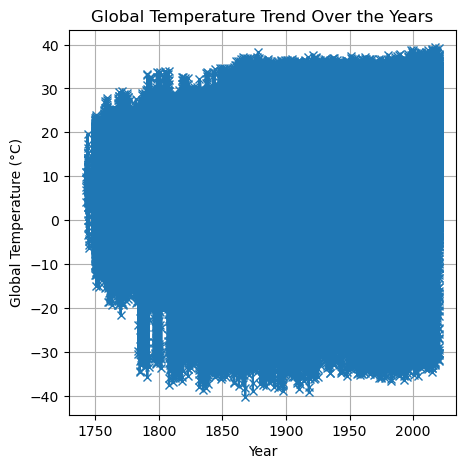

In [47]:
# Sort the data by year
df_sorted = df.sort_values(by='Years')

# Create a line chart to visualize the trend
plt.figure(figsize=(5, 5))
plt.plot(df_sorted['Years'], df_sorted['Temperature'], marker='x', linestyle='-')

# Label the axes
plt.xlabel('Year')
plt.ylabel('Global Temperature (°C)')

# Title for the chart
plt.title('Global Temperature Trend Over the Years')

# Display the plot
plt.grid(True)
plt.show()

In [48]:
# Find the month with the highest temperature for each country
highest_temp_months = df.groupby('Country')['Temperature'].idxmax()
df_highest_temperatures = df.loc[highest_temp_months]

# Find the month with the lowest temperature for each country
lowest_temp_months = df.groupby('Country')['Temperature'].idxmin()
df_lowest_temperatures = df.loc[lowest_temp_months]

# Display the results
print("Months with Highest Temperatures by Country:")
print(df_highest_temperatures)

print("\nMonths with Lowest Temperatures by Country:")
print(df_lowest_temperatures)

Months with Highest Temperatures by Country:
        Years  Month         Country  Temperature  Monthly_variation  Anomaly  \
2054     2019      7     Afghanistan       28.867              2.247    0.232   
5222     2012      7         Albania       26.041              3.881    0.301   
8050     2018      7         Algeria       36.157              2.717    0.286   
9753     2016      2  American Samoa       29.122              2.052    0.466   
12855    2003      8         Andorra       23.806              4.746    0.377   
...       ...    ...             ...          ...                ...      ...   
527606   2020      8  Virgin Islands       29.537              1.467    0.245   
529535   2009      7  Western Sahara       33.021              2.841    0.556   
531340   2019      7           Yemen       33.078              2.128    1.167   
532888   2016     10          Zambia       26.418              1.948    0.392   
534557   2019     11        Zimbabwe       26.732              2

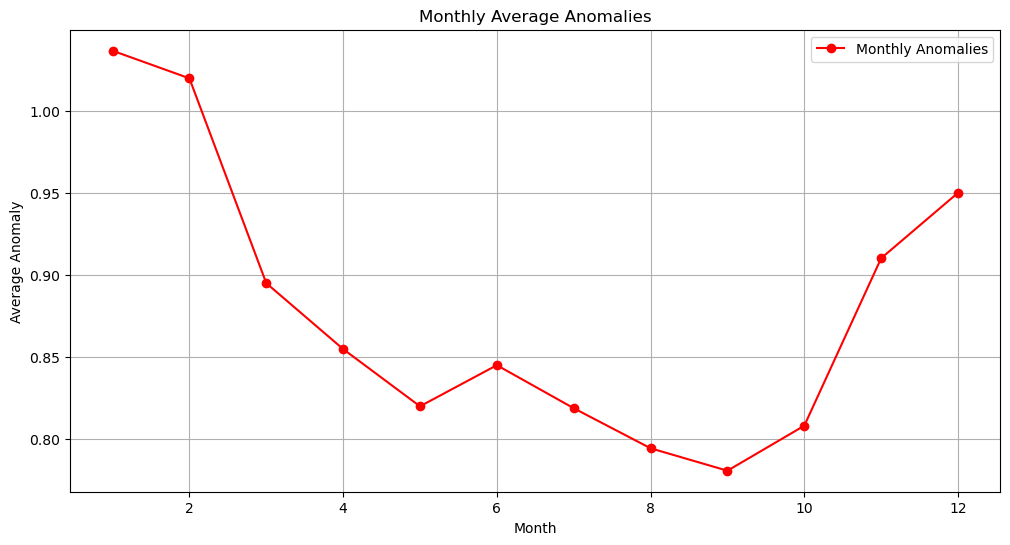

In [51]:
monthly_avg_anomalies = df.groupby('Month')['Anomaly'].mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the monthly anomalies with markers and lines
ax.plot(monthly_avg_anomalies.index, monthly_avg_anomalies, marker='o', linestyle='-', color='r', label='Monthly Anomalies')

# Label the axes
ax.set_xlabel('Month')
ax.set_ylabel('Average Anomaly')

# Title for the chart
ax.set_title('Monthly Average Anomalies')

# Gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [52]:
from scipy import stats

# Assuming 'monthly_avg_anomalies' is your Series of monthly anomalies

# Calculate z-scores for monthly anomalies
z_scores = stats.zscore(monthly_avg_anomalies)

# Define a threshold for high anomalies (e.g., z-score > 1 for high anomalies)
threshold = 1

# Identify months with consistently high anomalies
high_anomaly_months = [month for month, z_score in zip(monthly_avg_anomalies.index, z_scores) if z_score > threshold]

# Print the months with consistently high anomalies
if high_anomaly_months:
    print("Months with Consistently High Anomalies:", high_anomaly_months)
else:
    print("No months with consistently high anomalies found.")


Months with Consistently High Anomalies: [1, 2]


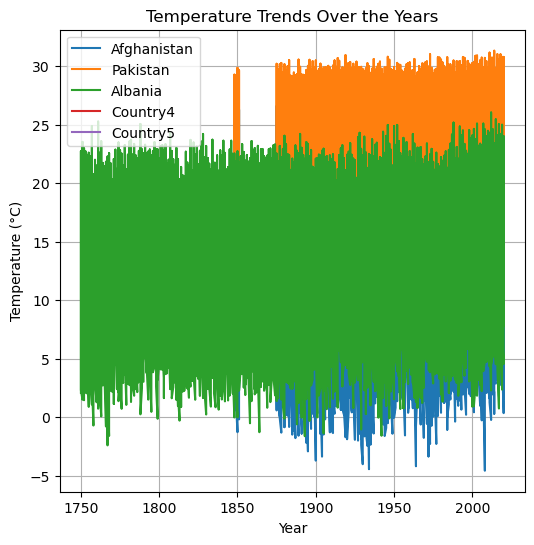

In [54]:
selected_countries = ['Afghanistan', 'Pakistan', 'Albania', 'Country4', 'Country5']
country_data = df[df['Country'].isin(selected_countries)]
plt.figure(figsize=(6, 6))

for country in selected_countries:
    country_data_filtered = country_data[country_data['Country'] == country]
    plt.plot(country_data_filtered['Years'], country_data_filtered['Temperature'], label=country)

# Label the axes
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Title for the chart
plt.title('Temperature Trends Over the Years')

# Add a legend to identify each country's data
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [55]:
# Calculate the correlation coefficients
temp_monthly_corr = df['Temperature'].corr(df['Month'])
temp_anomaly_corr = df['Temperature'].corr(df['Anomaly'])

# Create a dictionary to hold the results
correlation_results = {
    "Temperature vs. Monthly Variation": temp_monthly_corr,
    "Temperature vs. Anomaly": temp_anomaly_corr
}

# Print the correlation results
for label, correlation in correlation_results.items():
    print(f"Correlation between {label}:", correlation)


Correlation between Temperature vs. Monthly Variation: 0.08146438631991985
Correlation between Temperature vs. Anomaly: -0.3200123821755492


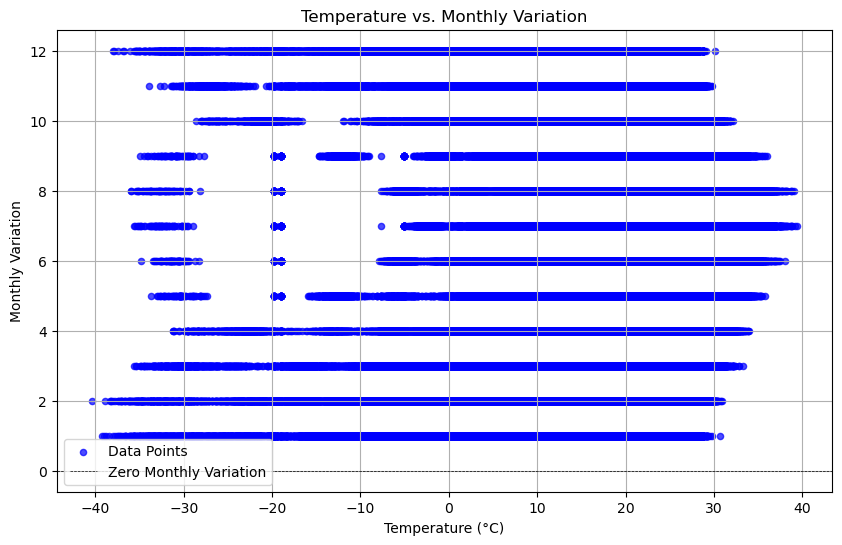

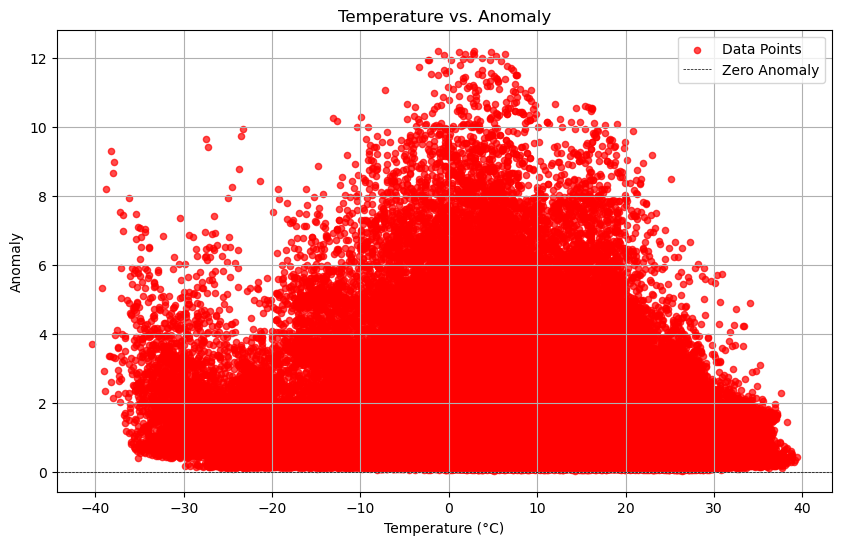

In [56]:
import matplotlib.pyplot as plt

# Create a scatterplot for Temperature vs. Monthly Variation
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Month'], alpha=0.7, c='blue', label='Data Points', s=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Monthly Variation')
plt.title('Temperature vs. Monthly Variation')
plt.grid(True)

# Customize the plot with grid and legend
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Zero Monthly Variation')
plt.legend(loc='best')

# Show the plot
plt.show()

# Create a scatterplot for Temperature vs. Anomaly
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Anomaly'], alpha=0.7, c='red', label='Data Points', s=20)
plt.xlabel('Temperature (°C)')
plt.ylabel('Anomaly')
plt.title('Temperature vs. Anomaly')
plt.grid(True)

# Customize the plot with grid and legend
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='Zero Anomaly')
plt.legend(loc='best')

# Show the plot
plt.show()
